##Obtaining the Data From the Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lahirunuwanprojects","key":"040fd16bf65538e8d0655b00e5deed46"}'}

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 75 Feb 11 09:01 kaggle.json


In [ ]:
!kaggle competitions download -c understanding_cloud_organization

100% 5.80G/5.80G [03:20<00:00, 21.4MB/s]
100% 5.80G/5.80G [03:20<00:00, 31.1MB/s]


#Preparing the Dataset For yolov8

Create the Required Folder Structure (root --> customDataset)
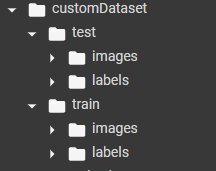

### Create Folder Structure and insert Images to it

In [ ]:
#unzip the downloaded File
data_location  = '/content/understanding_cloud_organization.zip'
import zipfile
#unzip our data
zip_ref = zipfile.ZipFile(data_location, "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
def remove_files_from_directory(directory):

  import shutil
  import os
  for filename in os.listdir(directory):
      file_path = os.path.join(directory, filename)
      try:
          if os.path.isfile(file_path) or os.path.islink(file_path):
              os.unlink(file_path)
          elif os.path.isdir(file_path):
              shutil.rmtree(file_path)
      except Exception as e:
          print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
!mkdir /content/customDataset
!mkdir /content/customDataset/train
!mkdir /content/customDataset/test

!mkdir /content/customDataset/train/images
!mkdir /content/customDataset/train/labels

!mkdir /content/customDataset/test/images
!mkdir /content/customDataset/test/labels
print(" --------- Folders SuccessFully - Created --------- ")

In [ ]:
#remove_files_from_directory('/content/customDataset/train/images')
#remove_files_from_directory('/content/customDataset/test/images')

In [ ]:
import shutil
import os

def copy_images(src_folder, dst_folder, num_images):
    '''This function copies the first num_images images from src_folder to dst_folder.'''
    image_names = os.listdir(src_folder)[:num_images]
    for image_name in image_names:
      src_file = os.path.join(src_folder, image_name)
      dst_file = os.path.join(dst_folder, image_name)
      shutil.move(src_file, dst_file)
      print("|", end="")

#Copying some Test images - here we are taking some of the images in the training folder for testing as well
source = '/content/train_images'
des = '/content/customDataset/test/images'
copy_images(source , des , 150)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
#Copying some Train images 
source = '/content/train_images'
des = '/content/customDataset/train/images'
copy_images(source , des , 1000)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
#get the list of Image names in the train folder
train_images = os.listdir('/content/customDataset/train/images')
test_images = os.listdir('/content/customDataset/test/images')
train_images[:10] , test_images[:10]

(['e69a0b2.jpg',
  '8c8d3d1.jpg',
  '48f2ea7.jpg',
  '983d323.jpg',
  '657399d.jpg',
  '74a109d.jpg',
  '30475b5.jpg',
  'c47989f.jpg',
  '67fb7e1.jpg',
  '4783deb.jpg'],
 ['0e77759.jpg',
  '0dcd917.jpg',
  '079aef5.jpg',
  '195f280.jpg',
  '99c0135.jpg',
  'c72878d.jpg',
  'e0bfbf6.jpg',
  '524d262.jpg',
  '833fbba.jpg',
  '1bf56de.jpg'])

### customize the CSV files according to the Dataset

In [ ]:
import pandas as pd

train_full = pd.read_csv('/content/train.csv')
submission = pd.read_csv('/content/sample_submission.csv')
print('Number of train samples:', train_full.shape[0])
print('Number of test samples:', submission.shape[0])

Number of train samples: 22184
Number of test samples: 14792


In [ ]:
train_full.head(3) , train_full.shape

(          Image_Label                                      EncodedPixels
 0    0011165.jpg_Fish  264918 937 266318 937 267718 937 269118 937 27...
 1  0011165.jpg_Flower  1355565 1002 1356965 1002 1358365 1002 1359765...
 2  0011165.jpg_Gravel                                                NaN,
 (22184, 2))

In [ ]:
#Filter only the used train images details
import pandas as pd

def filter_rows(df, image_label_list,col_name):
    '''This function filters the rows of the DataFrame where the value of the 'image_label' column is in the given list.'''
    df['first_part'] = df[col_name].str.split("_", n=1, expand=True)[0]
    return df[df['first_part'].isin(image_label_list)]

In [ ]:
train = filter_rows(train_full, train_images , 'Image_Label')
test = filter_rows(train_full, test_images , 'Image_Label')

In [ ]:
train.head(8) , train.shape 

(           Image_Label                                      EncodedPixels  \
 8     0031ae9.jpg_Fish  3510 690 4910 690 6310 690 7710 690 9110 690 1...   
 9   0031ae9.jpg_Flower  2047 703 3447 703 4847 703 6247 703 7647 703 9...   
 10  0031ae9.jpg_Gravel                                                NaN   
 11   0031ae9.jpg_Sugar  658170 388 659570 388 660970 388 662370 388 66...   
 12    0035239.jpg_Fish                                                NaN   
 13  0035239.jpg_Flower  100812 462 102212 462 103612 462 105012 462 10...   
 14  0035239.jpg_Gravel  65400 380 66800 380 68200 380 69600 380 71000 ...   
 15   0035239.jpg_Sugar                                                NaN   
 
      first_part  
 8   0031ae9.jpg  
 9   0031ae9.jpg  
 10  0031ae9.jpg  
 11  0031ae9.jpg  
 12  0035239.jpg  
 13  0035239.jpg  
 14  0035239.jpg  
 15  0035239.jpg  , (4000, 3))

In [ ]:
test.head()

,Image_Label,EncodedPixels,first_part
36,008a5ff.jpg_Fish,1038475 213 1039875 213 1041275 213 1042675 21...,008a5ff.jpg
37,008a5ff.jpg_Flower,NaN,008a5ff.jpg
38,008a5ff.jpg_Gravel,NaN,008a5ff.jpg
39,008a5ff.jpg_Sugar,2283 511 3683 511 5083 511 6483 511 7883 511 9...,008a5ff.jpg
200,029b861.jpg_Fish,961139 418 962047 910 963447 910 964823 1010 9...,029b861.jpg


In [ ]:
# Preprocecss data
train['image'] = train['Image_Label'].apply(lambda x: x.split('_')[0])
train['label'] = train['Image_Label'].apply(lambda x: x.split('_')[1])
# submission['image'] = submission['Image_Label'].apply(lambda x: x.split('_')[0])
# test = pd.DataFrame(submission['image'].unique(), columns=['image'])
test['image'] = test['Image_Label'].apply(lambda x: x.split('_')[0])
test['label'] = test['Image_Label'].apply(lambda x: x.split('_')[1])

display(train.head())

<ipython-input-19-0c79eb070234>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['image'] = train['Image_Label'].apply(lambda x: x.split('_')[0])
<ipython-input-19-0c79eb070234>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label'] = train['Image_Label'].apply(lambda x: x.split('_')[1])
<ipython-input-19-0c79eb070234>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Image_Label,EncodedPixels,first_part,image,label
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...,0031ae9.jpg,0031ae9.jpg,Fish
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...,0031ae9.jpg,0031ae9.jpg,Flower
10,0031ae9.jpg_Gravel,NaN,0031ae9.jpg,0031ae9.jpg,Gravel
11,0031ae9.jpg_Sugar,658170 388 659570 388 660970 388 662370 388 66...,0031ae9.jpg,0031ae9.jpg,Sugar
12,0035239.jpg_Fish,NaN,0035239.jpg,0035239.jpg,Fish


In [ ]:
display(train.describe()) , display(test.describe()) 

,Image_Label,EncodedPixels,first_part,image,label
count,4000,2127,4000,4000,4000
unique,4000,2127,1000,1000,4
top,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...,0031ae9.jpg,0031ae9.jpg,Fish
freq,1,1,4,4,1000


,Image_Label,EncodedPixels,first_part,image,label
count,600,322,600,600,600
unique,600,322,150,150,4
top,008a5ff.jpg_Fish,1038475 213 1039875 213 1041275 213 1042675 21...,008a5ff.jpg,008a5ff.jpg,Fish
freq,1,1,4,4,150


(None, None)

### Annotation Text File Creation and Store them in the relevent Folders


In [ ]:
import numpy as np

def rle_bounding_boxes(mask_rle, shape=(1400, 2100)):
    ''' This is the Finalized function to obtain the bounding Boxes from an given image '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    img = img.reshape(shape, order='F')
    y, x = np.where(img)
    xmin, xmax, ymin, ymax = np.min(x), np.max(x), np.min(y), np.max(y)
    return (xmin + xmax) / 2 / shape[1], (ymin + ymax) / 2 / shape[0], (ymax - ymin) / shape[0], (xmax - xmin) / shape[1]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bounding_box(image, bbox):
    center_x, center_y, height, width = bbox
    xmin = (center_x - width/2) * image.shape[1]
    xmax = (center_x + width/2) * image.shape[1]
    ymin = (center_y - height/2) * image.shape[0]
    ymax = (center_y + height/2) * image.shape[0]
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

<Figure size 4320x1440 with 0 Axes>

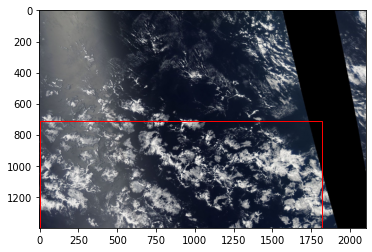

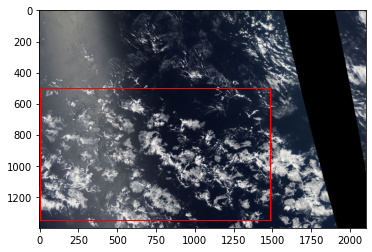

Exception


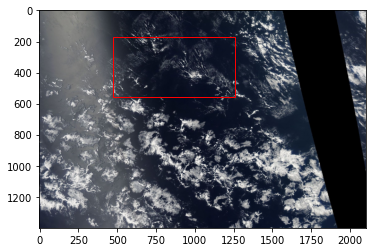

Exception


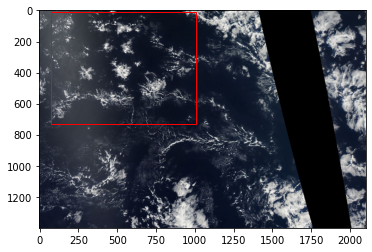

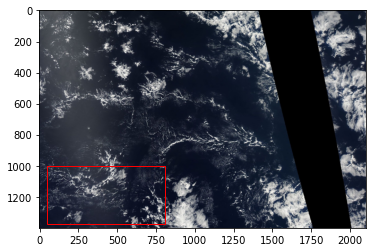

Exception


In [ ]:
import cv2
plt.figure(figsize=[60, 20])
import matplotlib.patches as patches

for index, row in train[:8].iterrows():
    img = cv2.imread("/content/customDataset/train/images/%s" % row['image'])[...,[2, 1, 0]]
    mask_rle = row['EncodedPixels']
    try: # label might not be there!
        bb = rle_bounding_boxes(mask_rle)   
    except:
        print("Exception")
        bb = tuple(np.zeros((1,4)))   
        continue
    
    plot_bounding_box(img , bb)

In [ ]:
train.shape , test.shape

((4000, 5), (600, 5))

In [ ]:
import cv2
plt.figure(figsize=[60, 20])
import matplotlib.patches as patches
bboxes = {
    'bbox' :[]
}
for index, row in train.iterrows():
    img = cv2.imread("/content/customDataset/train/images/%s" % row['image'])[...,[2, 1, 0]]
    mask_rle = row['EncodedPixels']
    try: # label might not be there!
        bb = rle_bounding_boxes(mask_rle)
        bboxes['bbox'].append(bb) 
        
    except:
        bb = (0,0,0,0)
        bboxes['bbox'].append(bb) 
        continue

<Figure size 4320x1440 with 0 Axes>

In [ ]:
#Generating Bounding Boxes for testing Images 
import cv2
plt.figure(figsize=[60, 20])
import matplotlib.patches as patches
testbboxes = {
    'bbox' :[]
}
for index, row in test.iterrows():
    img = cv2.imread("/content/customDataset/test/images/%s" % row['image'])[...,[2, 1, 0]]
    mask_rle = row['EncodedPixels']
    try: # label might not be there!
        bb = rle_bounding_boxes(mask_rle)
        testbboxes['bbox'].append(bb) 
        
    except:
        bb = (0,0,0,0)
        testbboxes['bbox'].append(bb) 
        continue

<Figure size 4320x1440 with 0 Axes>

In [ ]:
#Training-----------------
from sklearn.preprocessing import LabelEncoder
#adding the bbox column to the dataframe
train = train.assign(B=bboxes['bbox'])
train['A'] = train['EncodedPixels'].isnull()

le = LabelEncoder()
train['class'] = le.fit_transform(train['label'])

In [ ]:
#Testing-----------------
from sklearn.preprocessing import LabelEncoder
#adding the bbox column to the dataframe
test = test.assign(B=testbboxes['bbox'])
test['A'] = test['EncodedPixels'].isnull()

le = LabelEncoder()
test['class'] = le.fit_transform(test['label'])

In [ ]:
display(train.head(8))

,Image_Label,EncodedPixels,first_part,image,label,B,A,class
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...,0031ae9.jpg,0031ae9.jpg,Fish,"(0.43357142857142855, 0.7525, 0.49214285714285...",False,0
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...,0031ae9.jpg,0031ae9.jpg,Flower,"(0.3538095238095238, 0.66, 0.6057142857142858,...",False,1
10,0031ae9.jpg_Gravel,NaN,0031ae9.jpg,0031ae9.jpg,Gravel,"(0, 0, 0, 0)",True,2
11,0031ae9.jpg_Sugar,658170 388 659570 388 660970 388 662370 388 66...,0031ae9.jpg,0031ae9.jpg,Sugar,"(0.4119047619047619, 0.25892857142857145, 0.27...",False,3
12,0035239.jpg_Fish,NaN,0035239.jpg,0035239.jpg,Fish,"(0, 0, 0, 0)",True,0
13,0035239.jpg_Flower,100812 462 102212 462 103612 462 105012 462 10...,0035239.jpg,0035239.jpg,Flower,"(0.2571428571428571, 0.26535714285714285, 0.51...",False,1
14,0035239.jpg_Gravel,65400 380 66800 380 68200 380 69600 380 71000 ...,0035239.jpg,0035239.jpg,Gravel,"(0.20333333333333334, 0.8489285714285715, 0.27...",False,2
15,0035239.jpg_Sugar,NaN,0035239.jpg,0035239.jpg,Sugar,"(0, 0, 0, 0)",True,3


In [ ]:
display(test.head(8))

,Image_Label,EncodedPixels,first_part,image,label,B,A,class
36,008a5ff.jpg_Fish,1038475 213 1039875 213 1041275 213 1042675 21...,008a5ff.jpg,008a5ff.jpg,Fish,"(0.675952380952381, 0.4592857142857143, 0.9185...",False,0
37,008a5ff.jpg_Flower,NaN,008a5ff.jpg,008a5ff.jpg,Flower,"(0, 0, 0, 0)",True,1
38,008a5ff.jpg_Gravel,NaN,008a5ff.jpg,008a5ff.jpg,Gravel,"(0, 0, 0, 0)",True,2
39,008a5ff.jpg_Sugar,2283 511 3683 511 5083 511 6483 511 7883 511 9...,008a5ff.jpg,008a5ff.jpg,Sugar,"(0.17857142857142858, 0.7639285714285714, 0.46...",False,3
200,029b861.jpg_Fish,961139 418 962047 910 963447 910 964823 1010 9...,029b861.jpg,029b861.jpg,Fish,"(0.6628571428571428, 0.5189285714285714, 0.720...",False,0
201,029b861.jpg_Flower,NaN,029b861.jpg,029b861.jpg,Flower,"(0, 0, 0, 0)",True,1
202,029b861.jpg_Gravel,NaN,029b861.jpg,029b861.jpg,Gravel,"(0, 0, 0, 0)",True,2
203,029b861.jpg_Sugar,NaN,029b861.jpg,029b861.jpg,Sugar,"(0, 0, 0, 0)",True,3


In [ ]:
train.to_csv('train_n2.csv')
test.to_csv('test_n2.csv')

In [ ]:
#Generating Annotations for Training Dataset
from pandas.core.arrays.interval import NA
df = train
i = 0
for index , row in train.iterrows():
  #Creating a new Text File
  name =  row['image'].replace('.jpg',"")
  filename = os.path.join('/content/customDataset/train/labels',name + '.txt')

  with open(filename, 'w') as file:
    rows = df[df['Image_Label'].str.startswith(name)]
    for index, row in rows.iterrows():
      if(row['A']):
        continue
      else:
        file.write('{} {} {} {} {}\n'.format(row['class'],row['B'][0], row['B'][1], row['B'][2],row['B'][3]))
    # Rename the file to have the .txt extension
  os.rename(filename, filename)
  # i = i+1
  # if(i>5):
  #   break

In [ ]:
#Generating Annotations for Testing Dataset
from pandas.core.arrays.interval import NA
df = test
i = 0
for index , row in test.iterrows():
  #Creating a new Text File
  name =  row['image'].replace('.jpg',"")
  filename = os.path.join('/content/customDataset/test/labels',name + '.txt')
  
  with open(filename, 'w') as file:
    rows = df[df['Image_Label'].str.startswith(name)]
    for index, row in rows.iterrows():
      if(row['A']):
        continue
      else:
        file.write('{} {} {} {} {}\n'.format(row['class'],row['B'][0], row['B'][1], row['B'][2],row['B'][3]))
  os.rename(filename, filename)

In [ ]:
# #Compress and save the files for future use
# import os
# import zipfile

# # Create a ZIP file
# with zipfile.ZipFile('cloud_data_new2.zip', 'w') as zip_obj:
#   # Iterate over the directory tree
#   for root, dirs, files in os.walk('/content/customDataset'):
#     # Add all the files to the ZIP file
#     for file in files:
#       zip_obj.write(os.path.join(root, file))

# SOURCE_FILE_PATH = '/content/cloud_data_new2.zip'
# DRIVE_LOCATION_PATH = '/content/drive/MyDrive/cloud types'

# shutil.copy(SOURCE_FILE_PATH, DRIVE_LOCATION_PATH)

'/content/drive/MyDrive/cloud types/cloud_data_new2.zip'

##Training the Yolov8

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.1/276.1 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
#place the data.yaml file before running this cell
from ultralytics import YOLO

model = YOLO()
model.train(data="/content/data.yaml" , epochs=15)

Ultralytics YOLOv8.0.34 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [ ]:
#Zip the runs folder and store in d grive
#Compress and save the files for future use
import os
import zipfile
import shutil

# Create a ZIP file
with zipfile.ZipFile('runns_1000.zip', 'w') as zip_obj:
 
  for root, dirs, files in os.walk('/content/runs'):
    # Add all the files to the ZIP file
    for file in files:
      zip_obj.write(os.path.join(root, file))

SOURCE_FILE_PATH = '/content/runns_1000.zip'
DRIVE_LOCATION_PATH = '/content/drive/MyDrive/cloud types/results'

shutil.copy(SOURCE_FILE_PATH, DRIVE_LOCATION_PATH)

'/content/drive/MyDrive/cloud types/results/runns_1000.zip'

##Make New Prediction using best weights

In [ ]:
from ultralytics import YOLO

# Load a model
loaded_model = YOLO("/content/runs/detect/train2/weights/best.pt")  # load a custom model

image = '/content/test_images/0035ae9.jpg'
# Predict with the model
results = loaded_model(image)  

Ultralytics YOLOv8.0.34 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test_images/0035ae9.jpg: 448x640 1 Gravel, 26.6ms
Speed: 0.6ms pre-process, 26.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
for result in results:
  boxes = result.boxes  # Boxes object for bbox outputs
  print(boxes)

tensor([[7.00000e+00, 6.90000e+01, 1.91500e+03, 1.39900e+03, 2.68914e-01, 2.00000e+00]], device='cuda:0')
